In [1]:
# Stock Trend Prediction - Starter Notebook
# This notebook demonstrates the refactored stock_prediction package

import sys
from pathlib import Path

# Add src directory to path
sys.path.insert(0, str(Path.cwd() / 'src'))

# Import the refactored package
from src.stock_prediction import Config, DataFetcher, FeatureEngineer, ModelTrainer
from src.stock_prediction.utils import setup_logging

import matplotlib.pyplot as plt
import seaborn as sns

# Setup logging
logger = setup_logging(level="INFO")

print("✅ Stock Prediction package loaded successfully!")
print("📦 Available classes: Config, DataFetcher, FeatureEngineer, ModelTrainer")

✅ Stock Prediction package loaded successfully!
📦 Available classes: Config, DataFetcher, FeatureEngineer, ModelTrainer


In [2]:
# Step 1: Configure the project
config = Config(
    ticker="AAPL",
    start_date="2022-01-01",
    end_date="2023-12-31"
)

print("🎯 Configuration:")
print(f"   Ticker: {config.ticker}")
print(f"   Date Range: {config.start_date} to {config.end_date}")
print(f"   Test Size: {config.test_size}")

🎯 Configuration:
   Ticker: AAPL
   Date Range: 2022-01-01 to 2023-12-31
   Test Size: 0.2


In [3]:
# Step 2: Fetch data
data_fetcher = DataFetcher(config)
df = data_fetcher.fetch_data()

# Validate and summarize
data_fetcher.validate_data(df)
summary = data_fetcher.get_data_summary(df)

print("\n📊 Data Summary:")
print(f"   Rows: {summary['rows']}")
print(f"   Date Range: {summary['date_range']}")
print(f"   Price Range: ${summary['price_range']['min']:.2f} - ${summary['price_range']['max']:.2f}")

c:\Users\alpyaman\Desktop\Projects\Stock_Trend_Prediction\src\stock_prediction\data_fetcher.py:53: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)



📊 Data Summary:
   Rows: 501
   Date Range: 2022-01-03 00:00:00 to 2023-12-29 00:00:00
   Price Range: $123.16 - $196.26


In [4]:
# Step 3: Feature engineering
feature_engineer = FeatureEngineer(config)
df = feature_engineer.prepare_features(df, include_target=True)

print("\n🔧 Feature Engineering Complete:")
print(f"   Total Features: {len(df.columns)}")
print(f"   Rows after cleaning: {len(df)}")

# Display first few rows
df.head()


🔧 Feature Engineering Complete:
   Total Features: 19
   Rows after cleaning: 482


Price,Date,Close,High,Low,Open,Volume,SMA_14,EMA_14,RSI_14,MACD,MACD_signal,MACD_Hist,Bollinger_Bands_Upper,Bollinger_Bands_Lower,Close_t-1,RSI_14_t-1,DayOfWeek,Month,Target
0,2022-01-31,171.188843,171.404324,166.027120,166.663773,115541600,164.005272,164.514203,53.502797,-3.507495,-4.030665,0.523170,179.614769,153.128083,166.830307,47.172709,0,1,0
1,2022-02-01,171.022369,171.247639,168.769623,170.434691,86213900,163.972394,165.381959,49.313939,-2.689206,-3.762373,1.073168,178.239310,153.778743,171.188843,53.502797,1,2,1
2,2022-02-02,172.227081,172.266268,169.768659,171.159481,84914300,163.994081,166.294642,50.442461,-1.921347,-3.394168,1.472821,177.504250,154.135734,171.022369,49.313939,2,2,0
3,2022-02-03,169.347488,172.618874,168.583516,170.895027,89418100,164.043752,166.701688,51.025111,-1.527564,-3.020847,1.493283,177.241394,154.200738,172.227081,50.442461,3,2,0
4,2022-02-04,169.063110,170.740116,167.386104,168.366806,82465400,164.011543,167.016544,49.323762,-1.224322,-2.661542,1.437221,177.304251,154.197594,169.347488,51.025111,4,2,0


C:\Users\alpyaman\AppData\Local\Temp\ipykernel_10616\1438042611.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target', palette='Set2', ax=ax)


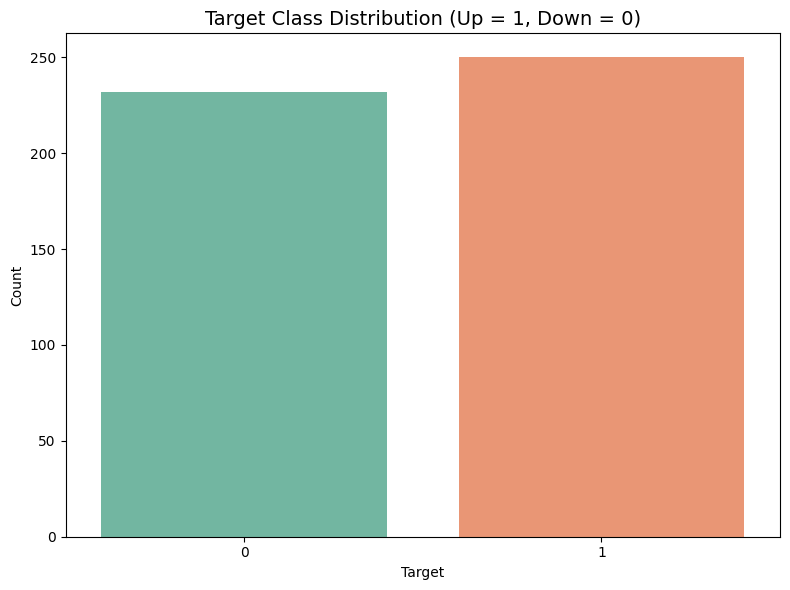


🔍 Top 10 Features Correlated with Target:
Price
Volume                   0.008
DayOfWeek               -0.003
MACD_Hist               -0.018
Bollinger_Bands_Lower   -0.033
Bollinger_Bands_Upper   -0.039
EMA_14                  -0.045
SMA_14                  -0.046
Month                   -0.056
RSI_14                  -0.057
Close_t-1               -0.060
dtype: float64

🔍 Bottom 10 Features Correlated with Target:
Price
Month         -0.056
RSI_14        -0.057
Close_t-1     -0.060
Close         -0.061
Low           -0.061
High          -0.064
Open          -0.065
RSI_14_t-1    -0.065
MACD_signal   -0.089
MACD          -0.090
dtype: float64


In [5]:
# Step 4: Exploratory Data Analysis

# Plot class distribution
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x='Target', palette='Set2', ax=ax)
ax.set_title("Target Class Distribution (Up = 1, Down = 0)", fontsize=14)
ax.set_xlabel("Target")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

# Feature correlations with target
numeric_cols = df.select_dtypes(include='number').drop(columns=['Target'], errors='ignore')
corr = numeric_cols.corrwith(df['Target']).sort_values(ascending=False)

print("\n🔍 Top 10 Features Correlated with Target:")
print(corr.head(10).round(3))

print("\n🔍 Bottom 10 Features Correlated with Target:")
print(corr.tail(10).round(3))

In [6]:
# Step 5: Prepare data for modeling

# Get feature columns
feature_cols = feature_engineer.get_feature_list(df, exclude_target=True)
print(f"📋 Feature columns ({len(feature_cols)}):")
print(feature_cols)

# Split features and target
X = df[feature_cols]
y = df['Target']

print("\n📊 Data shapes:")
print(f"   X: {X.shape}")
print(f"   y: {y.shape}")
print(f"   Target distribution: {y.value_counts().to_dict()}")

📋 Feature columns (13):
['Close', 'SMA_14', 'EMA_14', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_Hist', 'Bollinger_Bands_Upper', 'Bollinger_Bands_Lower', 'Close_t-1', 'RSI_14_t-1', 'DayOfWeek', 'Month']

📊 Data shapes:
   X: (482, 13)
   y: (482,)
   Target distribution: {1: 250, 0: 232}


In [7]:
# Step 6: Train-Test Split

# Initialize model trainer
trainer = ModelTrainer(config)

# Split data (no shuffle for time series)
X_train, X_test, y_train, y_test = trainer.split_data(X, y, shuffle=False)

print("✂️ Train-Test Split:")
print(f"   Train: {len(X_train)} samples")
print(f"   Test:  {len(X_test)} samples")
print(f"   Test ratio: {len(X_test) / len(X):.1%}")

✂️ Train-Test Split:
   Train: 385 samples
   Test:  97 samples
   Test ratio: 20.1%


In [8]:
# Step 7: Train Individual Models

print("🤖 Training Logistic Regression...")
lr = trainer.create_logistic_regression()
lr_trained = trainer.train_model(lr, X_train, y_train, scale_features=True)

print("\n🌲 Training Random Forest...")
rf = trainer.create_random_forest()
rf_trained = trainer.train_model(rf, X_train, y_train, scale_features=False)

print("\n🚀 Training XGBoost...")
xgb = trainer.create_xgboost()
xgb_trained = trainer.train_model(xgb, X_train, y_train, scale_features=False)

print("\n✅ All models trained successfully!")

🤖 Training Logistic Regression...

🌲 Training Random Forest...

🚀 Training XGBoost...

✅ All models trained successfully!


In [9]:
# Step 8: Evaluate Individual Models

print("📊 Logistic Regression Performance:")
lr_results = trainer.evaluate_model(lr_trained, X_test, y_test, scale_features=True)

print("\n📊 Random Forest Performance:")
rf_results = trainer.evaluate_model(rf_trained, X_test, y_test, scale_features=False)

print("\n📊 XGBoost Performance:")
xgb_results = trainer.evaluate_model(xgb_trained, X_test, y_test, scale_features=False)

📊 Logistic Regression Performance:

📊 Evaluation Results for LogisticRegression:
Confusion Matrix:
[[42  0]
 [55  0]]

Classification Report:
              precision    recall  f1-score   support

           0      0.433     1.000     0.604        42
           1      0.000     0.000     0.000        55

    accuracy                          0.433        97
   macro avg      0.216     0.500     0.302        97
weighted avg      0.187     0.433     0.262        97


📊 Random Forest Performance:

📊 Evaluation Results for RandomForestClassifier:
Confusion Matrix:
[[29 13]
 [34 21]]

Classification Report:
              precision    recall  f1-score   support

           0      0.460     0.690     0.552        42
           1      0.618     0.382     0.472        55

    accuracy                          0.515        97
   macro avg      0.539     0.536     0.512        97
weighted avg      0.550     0.515     0.507        97


📊 XGBoost Performance:

📊 Evaluation Results for XGBClassifier

c:\Users\alpyaman\Desktop\Projects\Stock_Trend_Prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alpyaman\Desktop\Projects\Stock_Trend_Prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alpyaman\Desktop\Projects\Stock_Trend_Prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [10]:
# Step 9: Create and Train Ensemble Model

print("🎯 Creating Ensemble Voting Classifier...")
ensemble = trainer.create_ensemble(lr_trained, rf_trained, xgb_trained)
ensemble_trained = trainer.train_model(ensemble, X_train, y_train, scale_features=False)

print("\n📊 Ensemble Model Performance:")
ensemble_results = trainer.evaluate_model(ensemble_trained, X_test, y_test, scale_features=False)

🎯 Creating Ensemble Voting Classifier...


c:\Users\alpyaman\Desktop\Projects\Stock_Trend_Prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📊 Ensemble Model Performance:

📊 Evaluation Results for VotingClassifier:
Confusion Matrix:
[[30 12]
 [40 15]]

Classification Report:
              precision    recall  f1-score   support

           0      0.429     0.714     0.536        42
           1      0.556     0.273     0.366        55

    accuracy                          0.464        97
   macro avg      0.492     0.494     0.451        97
weighted avg      0.501     0.464     0.439        97



c:\Users\alpyaman\Desktop\Projects\Stock_Trend_Prediction\src\stock_prediction\models.py:313: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\alpyaman\Desktop\Projects\Stock_Trend_Prediction\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


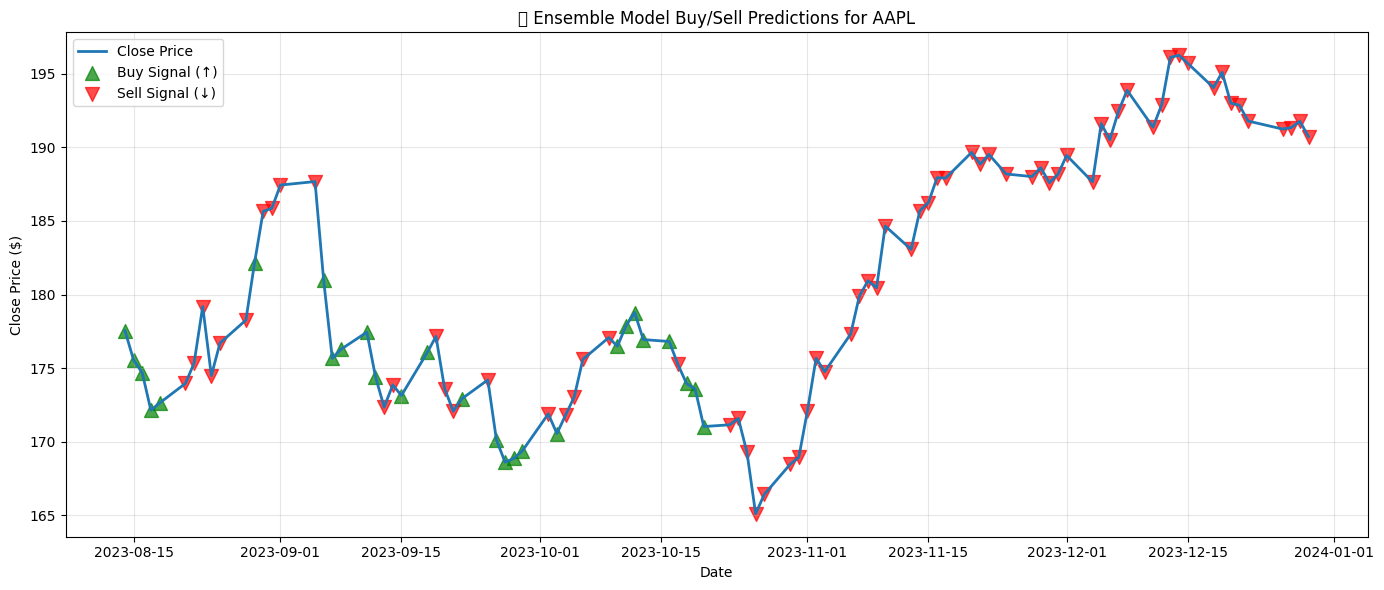

📈 Green triangles (↑) = Buy signals (predict price will go up)
📉 Red triangles (↓) = Sell signals (predict price will go down)


In [11]:
# Step 10: Visualize Predictions

# Get test data subset
df_test = df.iloc[-len(y_test):].reset_index(drop=True)

# Plot ensemble predictions
trainer.plot_predictions(
    df_test,
    ensemble_results['predictions'],
    title=f"Ensemble Model Buy/Sell Predictions for {config.ticker}",
    save_path=None  # Display in notebook
)

print("📈 Green triangles (↑) = Buy signals (predict price will go up)")
print("📉 Red triangles (↓) = Sell signals (predict price will go down)")

🔍 Random Forest Feature Importance:


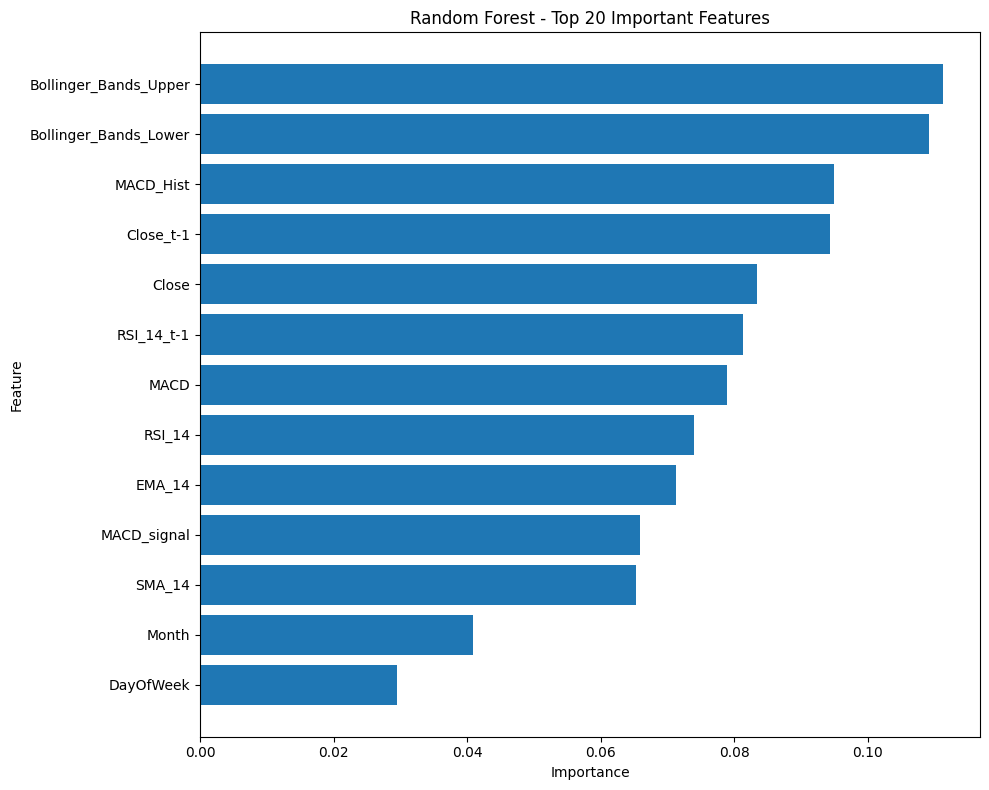


🔍 XGBoost Feature Importance:


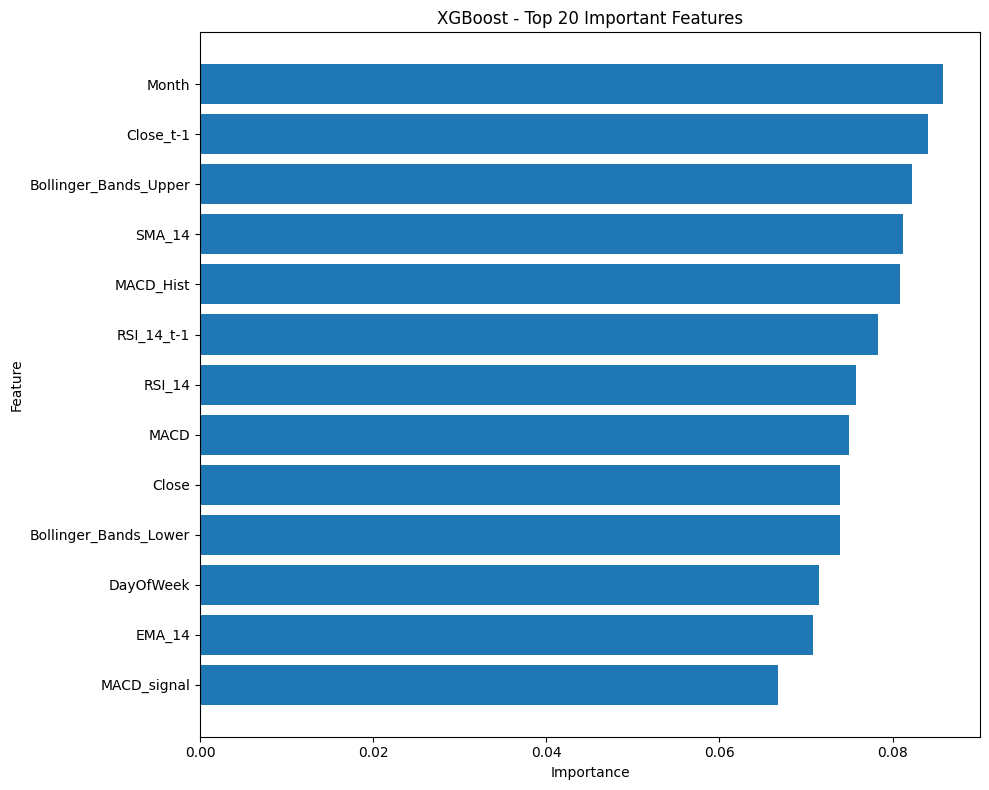

In [12]:
# Step 11: Feature Importance Analysis

print("🔍 Random Forest Feature Importance:")
trainer.plot_feature_importance(
    rf_trained,
    feature_cols,
    title="Random Forest - Top 20 Important Features",
    save_path=None,
    top_n=20
)

print("\n🔍 XGBoost Feature Importance:")
trainer.plot_feature_importance(
    xgb_trained,
    feature_cols,
    title="XGBoost - Top 20 Important Features",
    save_path=None,
    top_n=20
)